Task 1
# **Investigate and analyze price data**

In [ ]:
pip install pmdarima


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



Importing Data and initial impressions

In [ ]:
df=pd.read_csv('/content/1990-2021.csv',index_col='Dates',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (59, 1)


,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


<Axes: xlabel='Dates'>

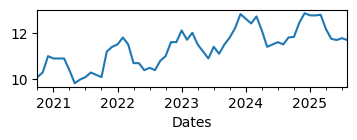

In [ ]:
df['Prices'].plot(figsize=(4,1))


Clear Seasonlity and Non Stationarity visible. Running ADF test to confirm.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  deftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF: ", deftest[0])
  print("2. p value: ", deftest[1])
  #print("3. Num of lags: ", deftest[2])
  print("4. Num of values used for ADF regression and critical values calculations: ", deftest[3])
  print("5. Critical values: ")
  for key, val in deftest[4].items():
    print("\t",key, ": ", val)

In [ ]:
ad_test(df['Prices'])

1. ADF:  -1.4698118457998124
2. p value:  0.5483886486756631
4. Num of values used for ADF regression and critical values calculations:  48
5. Critical values: 
	 1% :  -3.5745892596209488
	 5% :  -2.9239543084490744
	 10% :  -2.6000391840277777


Differencing to make data **Stationary**

In [ ]:
df['Prices first difference']=df['Prices']-df['Prices'].shift(1)
#df['Seasonal first difference']=df['Prices']-df['Prices'].shift(6)
df=df.dropna()
df.head()

,Prices,Prices first difference
Dates,,
2020-11-30,10.3,0.2
2020-12-31,11.0,0.7
2021-01-31,10.9,-0.1
2021-02-28,10.9,0.0
2021-03-31,10.9,0.0


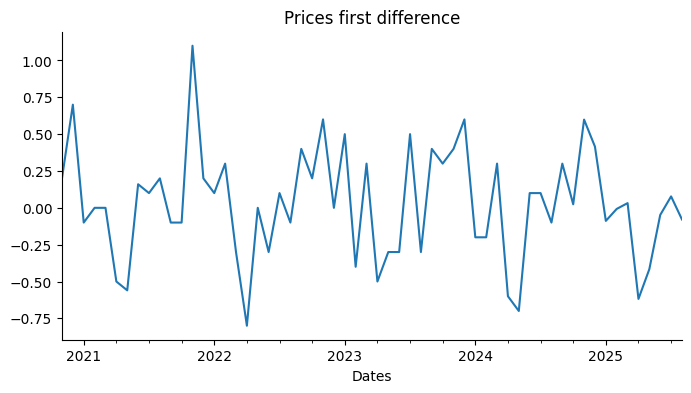

In [ ]:
# @title Prices first difference

from matplotlib import pyplot as plt
df['Prices first difference'].plot(kind='line', figsize=(8, 4), title='Prices first difference')
plt.gca().spines[['top', 'right']].set_visible(False)

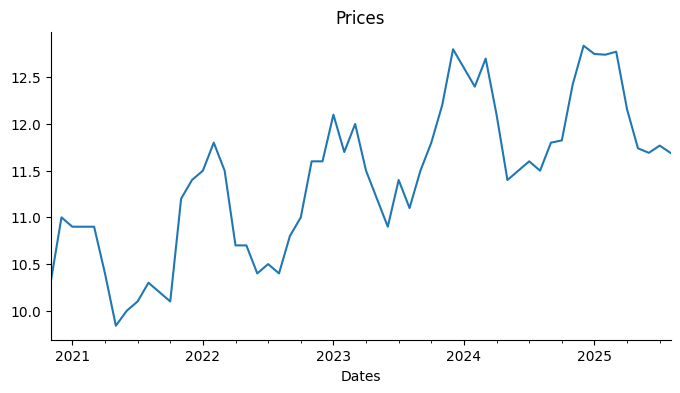

In [ ]:
# @title Prices

from matplotlib import pyplot as plt
df['Prices'].plot(kind='line', figsize=(8, 4), title='Prices')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#df['Seasonal first difference'].plot(figsize=(4,1))

<Axes: xlabel='Dates'>

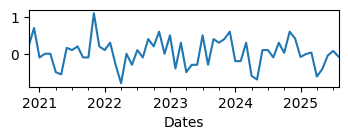

In [ ]:
df['Prices first difference'].plot(figsize=(4,1))

Confirming Stationarity using ADF test.

In [ ]:
ad_test(df['Prices first difference'])

1. ADF:  -7.234208434549554
2. p value:  1.9587474243100448e-10
4. Num of values used for ADF regression and critical values calculations:  48
5. Critical values: 
	 1% :  -3.5745892596209488
	 5% :  -2.9239543084490744
	 10% :  -2.6000391840277777


In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

Determining best model for making predictions.

In [ ]:
stepwise_fit = auto_arima(df['Prices first difference'], trace=True,
                          suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=55.101, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=56.265, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=56.404, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=53.409, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=58.033, Time=0.34 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 2.114 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   58
Model:                        SARIMAX   Log Likelihood                 -25.704
Date:                Fri, 26 Jul 2024   AIC                             53.409
Time:                        09:20:24   BIC                             55.469
Sample:                    11-30-2020   HQIC                            54.212
                         - 08-31-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1421      0.026      5.509      0.000       0.092       0.193
===================================================================================
Ljung-Box (L1) (Q):                   0.88   Jarque-Bera (JB):                 0.11
Prob(Q):                              0.35   Prob(JB):                         0.95
Heteroskedasticity (H):               0.67   Skew:                             0.10
Prob(H) (two-sided):                  0.40   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# **Trainig** **Predections**

In [ ]:
print(df.shape)
train=df.iloc[:-23]
test=df.iloc[-23:]
print(train.shape,test.shape)

(58, 2)
(35, 2) (23, 2)


In [ ]:
from statsmodels.tsa.arima.estimators.statespace import SARIMAX

model=SARIMAX(train['Prices'],order=(2,0,2),seasonal_order=(2,0,2,12))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Prices   No. Observations:                   35
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 12)   Log Likelihood                 -13.694
Date:                            Fri, 26 Jul 2024   AIC                             45.387
Time:                                    09:20:27   BIC                             59.385
Sample:                                11-30-2020   HQIC                            50.219
                                     - 09-30-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0299      0.140      0.214      0.830      -0.244       0.303
ar.L2          0.9610      0.139      6.917      0.000       0.689       1.233
ma.L1          0.5860      0.525      1.117      0.264      -0.443       1.615
ma.L2         -0.1974      0.424     -0.466      0.642      -1.029       0.634
ar.S.L12      -0.0569     32.935     -0.002      0.999     -64.607      64.494
ar.S.L24       0.8503     32.406      0.026      0.979     -62.664      64.365
ma.S.L12       1.0372    276.752      0.004      0.997    -541.386     543.461
ma.S.L24       0.9068    109.275      0.008      0.993    -213.269     215.082
sigma2         0.0151      3.283      0.005      0.996      -6.419       6.450
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.95
Prob(Q):                              0.82   Prob(JB):                         0.62
Heteroskedasticity (H):               1.41   Skew:                             0.33
Prob(H) (two-sided):                  0.56   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Dates'>

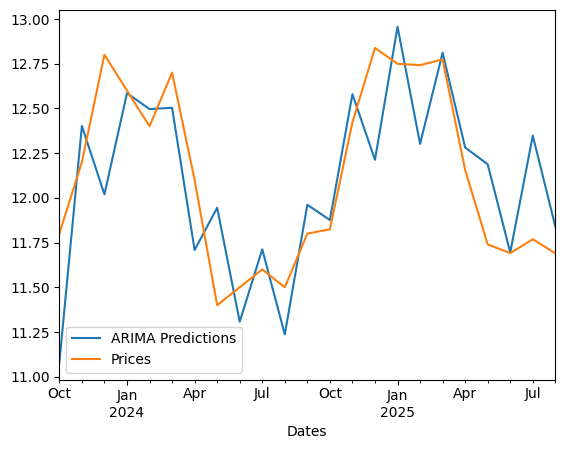

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Prices'].plot(legend=True)

Testing the RMS error

In [ ]:
test['Prices'].mean()

12.12145655043478

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Prices']))
print(rmse)

0.3638037403363305


RMSE indicates Good Fit.

# **Future** **Predictions**

In [ ]:
print(df.shape)
train=df.iloc[:-1]
test=df.iloc[-12:]
print(train.shape,test.shape)

(58, 2)
(57, 2) (12, 2)


In [ ]:
from statsmodels.tsa.arima.estimators.statespace import SARIMAX

model=SARIMAX(train['Prices'],order=(2,0,2),seasonal_order=(2,0,2,12))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Prices   No. Observations:                   57
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 12)   Log Likelihood                  -8.603
Date:                            Fri, 26 Jul 2024   AIC                             35.205
Time:                                    09:20:32   BIC                             53.593
Sample:                                11-30-2020   HQIC                            42.351
                                     - 07-31-2025                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0305      0.302      0.101      0.920      -0.561       0.622
ar.L2          0.9619      0.301      3.198      0.001       0.372       1.551
ma.L1          0.4476      0.260      1.722      0.085      -0.062       0.957
ma.L2         -0.5300      0.190     -2.792      0.005      -0.902      -0.158
ar.S.L12       0.2899      2.012      0.144      0.885      -3.654       4.234
ar.S.L24       0.6968      1.978      0.352      0.725      -3.180       4.573
ma.S.L12       0.2283     15.821      0.014      0.988     -30.780      31.237
ma.S.L24      -0.7406     11.570     -0.064      0.949     -23.418      21.937
sigma2         0.0394      0.544      0.072      0.942      -1.026       1.105
===================================================================================
Ljung-Box (L1) (Q):                   0.79   Jarque-Bera (JB):                 2.01
Prob(Q):                              0.37   Prob(JB):                         0.37
Heteroskedasticity (H):               0.21   Skew:                             0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Dates'>

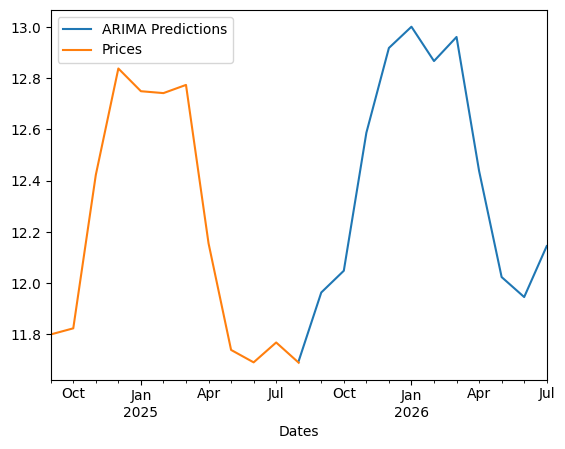

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Prices'].plot(legend=True)

# **Contract pricing script**

In [ ]:
def read_csv_data(file_path):
    data = {}
    with open(file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            date_str = row['Dates']
            date = parser.parse(date_str)
            data[date] = float(row['Prices'])
    return data


def calculate_storage_months(injection_date, withdrawal_date):
    return ((withdrawal_date.year - injection_date.year) * 12 + withdrawal_date.month) - (injection_date.month)

def calculate_total_expenditure(storage_months, fixed_storage_price, cost_injection, cost_withdrawal, amount_of_gas):
    return (storage_months * fixed_storage_price) + (cost_injection + cost_withdrawal) * amount_of_gas

def main():
    file_path = "1990-2021.csv"
    data = read_csv_data(file_path)

    # User inputs
    injection_month, injection_year = map(int, input("Enter the month and year of injection (MM YYYY): ").split())
    withdrawal_month, withdrawal_year = map(int, input("Enter the month and year of withdrawal (MM YYYY): ").split())
    cost_injection = float(input("Enter the cost of injection ($ per MMbtu): "))
    cost_withdrawal = float(input("Enter the cost of withdrawal ($ per MMbtu): "))
    fixed_storage_price = float(input("Enter the fixed storage price for every month: "))
    amount_of_gas = float(input("Enter the amount of gas being stored (MMbtu): "))

    date_of_injection = datetime(injection_year, injection_month, 1)
    date_of_withdrawal = datetime(withdrawal_year, withdrawal_month, 1)

    # Calculate storage months
    storage_months = calculate_storage_months(date_of_injection, date_of_withdrawal)

    # Calculate profit
    total_expenditure = calculate_total_expenditure(storage_months, fixed_storage_price, cost_injection, cost_withdrawal, amount_of_gas)
    contract_value = sum(data[date] for date in data if date_of_injection <= date <= date_of_withdrawal) * amount_of_gas
    profit = contract_value - total_expenditure

    print(f"Total Expenditure on Storage: {total_expenditure}")
    print(f"Profit from the Contract: {profit}")
    print(f"Months: {storage_months}")
if __name__ == "__main__":
    main()